<a href="https://colab.research.google.com/github/flexcompute-readthedocs/tidy3d-docs/blob/alec%2Fperiodic-structures/arrays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tidy3d
import tidy3d.web as web
web.configure("ZMFCYeAdFMUW0nfCPjWkqZ9F8CRcJipBU96yDbZbB25ZsEF9")
import tidy3d as td
import numpy as np

In [ ]:
web.test()

[16:04:16] Authentication configured successfully!                                                    ]8;id=822426;file:///usr/local/lib/python3.10/dist-packages/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=40377;file:///usr/local/lib/python3.10/dist-packages/tidy3d/web/webapi.py#785\785]8;;\

In [ ]:
!pip install gdstk

In [ ]:
import matplotlib.pyplot as plt

## Respective function formats for the above structures starting here:

Create square array of cylinders:

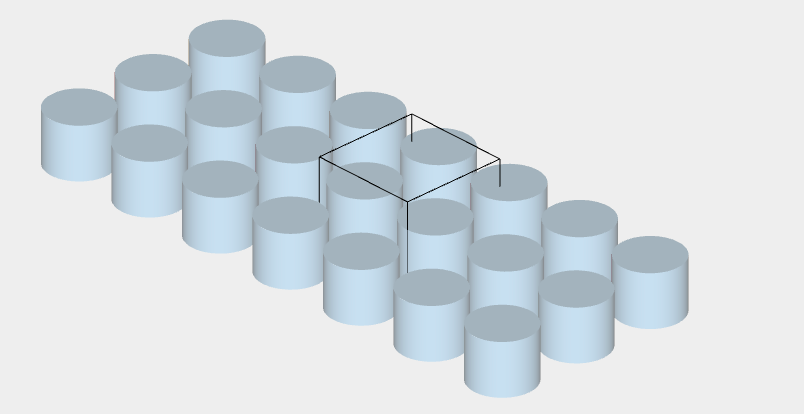

In [5]:
# This script object defines a square array of cylinders and
# returns the tidy3d structure of it.

def square_cylinder_array(x0, y0, z0, R, hole_spacing_x, hole_spacing_y, n_x, n_y, height, medium, reference_plane, sidewall_angle=0, axis=2):
  # parameters
  #------------------------------------------------------------
  # x0: x coordinate of center of the array (um)
  # y0: y coordinate of center of the array (um)
  # z0: z coordinate of center of the array (um)
  # R: radius of the circular holes (um)
  # hole_spacing_x: distance between centers of holes in x direction (um)
  # hole_spacing_y: distance between centers of holes in y direction (um)
  # n_x: number of holes in x direction
  # n_y: number of holes in y direction
  # height: height of array
  # medium: medium of the cylinders
  # reference_plane
  # sidewall_angle: angle slant of cylinders
  # axis

  cylinder_group = []

  start_x, start_y = x0 + hole_spacing_x*(1-n_x)/2, y0 + hole_spacing_y*(1-n_y)/2
  for i in range(0, n_x):
    for j in range(0, n_y):
      c = td.Cylinder(axis=axis,
                      sidewall_angle=sidewall_angle,
                      reference_plane=reference_plane,
                      radius=R,
                      center=(start_x+i*hole_spacing_x, start_y+j*hole_spacing_y, z0),
                      length=height)
      cylinder_group.append(c)


  structure = td.Structure(geometry=td.GeometryGroup(geometries=cylinder_group), medium=medium)


  return [structure]

Create slab with square array of holes:
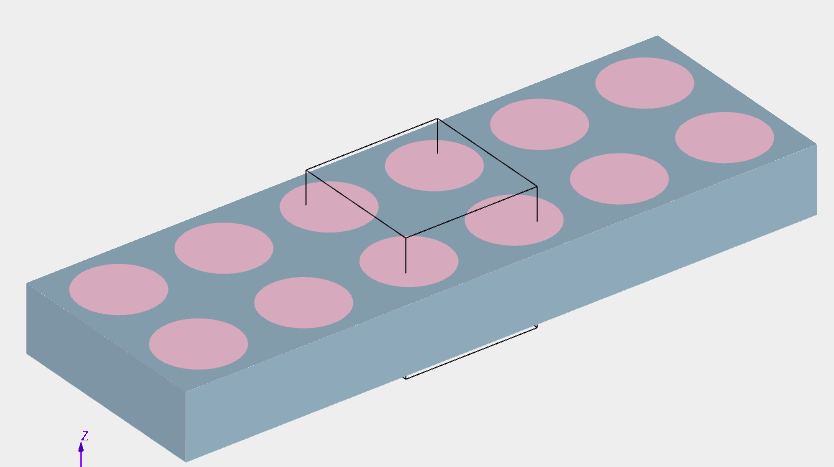

In [3]:
# This script object defines a square array of holes in a slab and
# returns the tidy3d structure of it.

def generate_object(x0, y0, z0, R, hole_spacing_x, hole_spacing_y, n_x, n_y, height, hole_medium, slab_medium, reference_plane='bottom', sidewall_angle=0, axis=2):
  # parameters
  #------------------------------------------------------------
  # x0: x coordinate of center of the array (um)
  # y0: y coordinate of center of the array (um)
  # z0: z coordinate of center of the array (um)
  # R: radius of the circular holes (um)
  # hole_spacing_x: distance between centers of holes in x direction (um)
  # hole_spacing_y: distance between centers of holes in y direction (um)
  # n_x: number of holes in x direction
  # n_y: number of holes in y direction
  # height: height of array
  # hole_medium: medium of the holes
  # slab_medium: medium of the slab
  # reference_plane
  # sidewall_angle: angle slant of cylinders. Add compensation for the box geometry if != 0?
  # axis

  start_x, start_y = x0 - hole_spacing_x*(n_x-1)/2, y0 - hole_spacing_y*(n_y-1)/2

  box = td.Box(center=(x0, y0, z0), size=(hole_spacing_x*n_x, hole_spacing_y*n_y, height))
  structures = [td.Structure(geometry=box, medium=slab_medium)]
  cylinders = []

  for i in range(0, n_x):
    for j in range(0, n_y):
      c = td.Cylinder(axis=axis,
                      sidewall_angle=sidewall_angle,
                      reference_plane=reference_plane,
                      radius=R,
                      center=(start_x+i*hole_spacing_x, start_y+j*hole_spacing_y, z0),
                      length=height)
      cylinders.append(c)

  cylinders_structure = td.Structure(geometry=td.GeometryGroup(geometries=cylinders), medium=hole_medium)

  structures.append(cylinders_structure)

  return structures

Create a slab with a hexagonal array of holes:
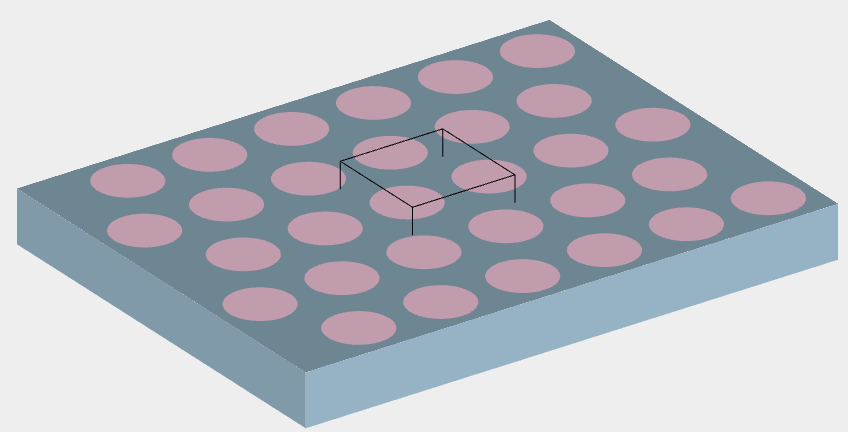

In [4]:
# This script object defines a hexagonal array of holes in a slab and
# returns the tidy3d structure of it.

def generate_object(x0, y0, z0, R, hole_spacing_x, hole_spacing_y, n_x, n_y, height, hole_medium, slab_medium, reference_plane='bottom', sidewall_angle=0, axis=2):
  # parameters
  #------------------------------------------------------------
  # x0: x coordinate of center of the array (um)
  # y0: y coordinate of center of the array (um)
  # z0: z coordinate of center of the array (um)
  # R: radius of the circular holes (um)
  # hole_spacing_x: distance between centers of holes in x direction (um)
  # hole_spacing_y: distance between centers of holes in y direction (um)
  # n_x: number of holes in x direction
  # n_y: number of holes in y direction
  # height: height of array
  # hole_medium: medium of the holes
  # slab_medium: medium of the slab
  # reference_plane
  # sidewall_angle: angle slant of cylinders. Add compensation for the box geometry if != 0?
  # axis


  # define geometry for slab
  x_slab_length, y_slab_length = hole_spacing_x*(n_x+0.5), hole_spacing_y*n_y
  start_x, start_y = x0 - x_slab_length/2 + hole_spacing_x/2, y0 - y_slab_length/2 + hole_spacing_y/2
  box = td.Box(center=(x0, y0, z0), size=(x_slab_length, y_slab_length, height))

  structures = [td.Structure(geometry=box, medium=slab_medium)]

  cylinders = []
  for i in range(0, n_x):
    for j in range(0, n_y):
      c = td.Cylinder(axis=axis,
                      sidewall_angle=sidewall_angle,
                      reference_plane=reference_plane,
                      radius=R,
                      center=(start_x+(i+(j%2)*0.5)*hole_spacing_x, start_y+j*hole_spacing_y, z0),
                      length=height)
      cylinders.append(c)

  cylinders_structure = td.Structure(geometry=td.GeometryGroup(geometries=cylinders), medium=hole_medium)

  structures.append(cylinders_structure)

  return structures

Create a hexagonal array of cylinders:
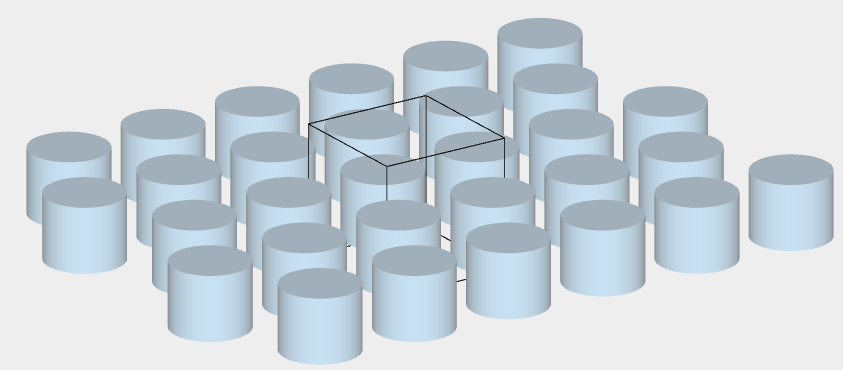

In [6]:
# This script object defines a hexagonal array of cylinders and
# returns the tidy3d structure of it.

def generate_object(x0, y0, z0, R, hole_spacing_x, hole_spacing_y, n_x, n_y, height, medium, reference_plane='bottom', sidewall_angle=0, axis=2):
  # parameters
  #------------------------------------------------------------
  # x0: x coordinate of center of the array (um)
  # y0: y coordinate of center of the array (um)
  # z0: z coordinate of center of the array (um)
  # R: radius of the circular holes (um)
  # hole_spacing_x: distance between centers of holes in x direction (um)
  # hole_spacing_y: distance between centers of holes in y direction (um)
  # n_x: number of holes in x direction
  # n_y: number of holes in y direction
  # height: height of array
  # medium: medium of the holes
  # reference_plane
  # sidewall_angle: angle slant of cylinders. Add compensation for the box geometry if != 0?
  # axis


  x_slab_length, y_slab_length = hole_spacing_x*(n_x+0.5), hole_spacing_y*n_y
  start_x, start_y = x0 - x_slab_length/2 + hole_spacing_x/2, y0 - y_slab_length/2 + hole_spacing_y/2

  cylinders = []

  for i in range(0, n_x):
    for j in range(0, n_y):
      c = td.Cylinder(axis=axis,
                      sidewall_angle=sidewall_angle,
                      reference_plane=reference_plane,
                      radius=R,
                      center=(start_x+(i+(j%2)*0.5)*hole_spacing_x, start_y+j*hole_spacing_y, z0),
                      length=height)
      cylinders.append(c)

  structure = td.Structure(geometry=td.GeometryGroup(geometries=cylinders), medium=medium)


  return [structure]

Create a rectangular grating:

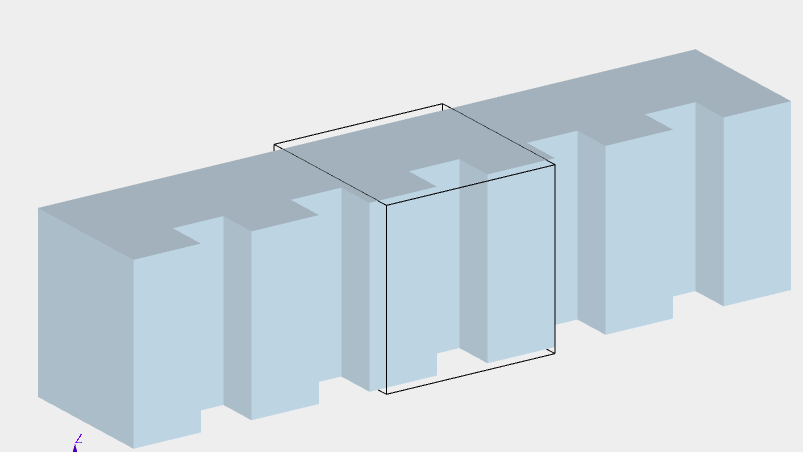

In [8]:
# This script object defines a rectangular grating and
# returns the tidy3d structure of it.

def generate_object(x0, y0, z0, tooth_width, tooth_height, spacing, base_height, thickness, tooth_number, medium, reference_plane='bottom', sidewall_angle=0, axis=2):
  # parameters
  #------------------------------------------------------------
  # x0: x coordinate of center of the grating (um)
  # y0: y coordinate of center of the grating (um)
  # z0: z coordinate of center of the grating (um)
  # tooth_width: width of each grating tooth (um)
  # tooth_height: height of each tooth (um)
  # spacing: spacing between teeth (um)
  # base_height: height of underlying base (um)
  # thickness: width of underlying base (um)
  # tooth_number: number of teeth in grating
  # medium: medium of the grating
  # reference_plane
  # sidewall_angle: angle of slant
  # axis

  x_length, z_length = (tooth_width+spacing)*tooth_number-spacing, tooth_height+base_height
  start_x, start_z = x0-x_length/2, z0+z_length/2

  # create list of points as vertices for polyslab
  points = [(start_x, start_z), (start_x+tooth_width, start_z)]
  prevPoint = points[-1]
  # adding points for teeth
  for i in range(0, tooth_number-1):
    points.append((prevPoint[0], prevPoint[1]-tooth_height))
    points.append((prevPoint[0]+spacing, prevPoint[1]-tooth_height))
    points.append((prevPoint[0]+spacing, prevPoint[1]))
    prevPoint = (prevPoint[0]+spacing+tooth_width, prevPoint[1])
    points.append(prevPoint)
  points.append((prevPoint[0], prevPoint[1]-z_length))
  points.append((prevPoint[0]-x_length, prevPoint[1]-z_length))

  grating = td.PolySlab(vertices=points,
                        axis=axis,
                        slab_bounds=(-thickness/2, thickness/2),
                        sidewall_angle=sidewall_angle,
                        reference_plane=reference_plane
                        )

  structure = td.Structure(geometry=grating, medium=medium)

  return [structure]